## Analysis of mutual information

In [102]:
# basic imports
import numpy as np                                        
import matplotlib.pyplot as plt     
import pickle
import pandas as pd
# Loading ipython widgets for interactive features:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [22]:
import sys
sys.path.append("../../../hspace/")
import hspace.measures
import importlib
importlib.reload(hspace.measures)

pymc is not installed - Bayesian entropy estimation will not work.


<module 'hspace.measures' from '../../../hspace/hspace/measures.py'>

### Generating data

As a first step, we generate realizations for a field of _independent_ random variables:

In [157]:
# Set number of samples:
n = 1000
# Draw from uniform distribution:
rv = np.random.randint(10, size=(n,20,20))+1

Here a representation of some of these fields:

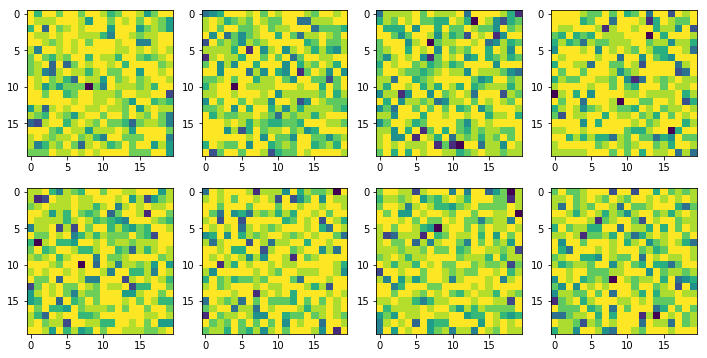

In [151]:
plt.figure(figsize=(12,6))
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.imshow(rv[i])
    # plt.colorbar()

### Entropy and Mutual Information

We now calculate entropy and mutual information fields, as before:

In [152]:
h_sec = hspace.measures.EntropySection(rv)

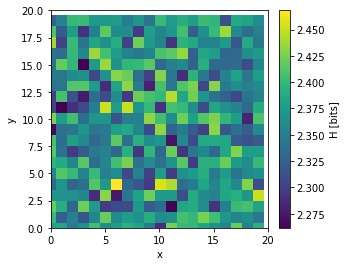

In [153]:
h_sec.plot_entropy()

Here now the mutual information between one variable (cell in center) and all other cells in the domain:

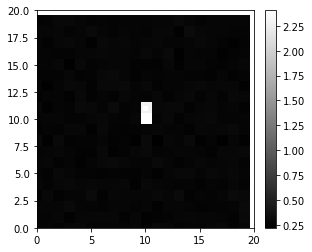

In [154]:
pos = np.array([[10,10],[10,11]]) #,[10,12]])
h_sec.calc_cond_entropy_section(pos=pos)
h_sec.plot_mutual_info(pos=pos) #, vmin=0., vmax=2)

And here in a histogram for a quantitative analysis:

In [155]:
def m_hist(hmin, hmax):
    plt.hist((h_sec.h - h_sec.cond_entropy_section).ravel(), bins=np.linspace(hmin,hmax));
    
interact(m_hist, 
         hmin=widgets.FloatSlider(min=0.,max=10.,step=.1,value=0.),
         hmax=widgets.FloatSlider(min=0.,max=10.,step=.1,value=10.));

interactive(children=(FloatSlider(value=0.0, description='hmin', max=10.0), FloatSlider(value=10.0, descriptio…

**To discuss**:
- What do we observe? Remember: all variables are _independent_!
- What would happen if the distribution would not be _uniform_?
- What to do?

### Extra: non-uniform distribution

For you to test: here a simple implementation to generate non-uniform samples:

Text(0, 0.5, 'Probability')

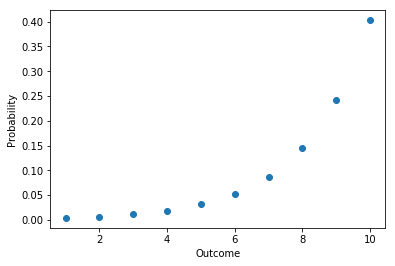

In [149]:
# to test non-uniform distribution - logarithmic spacing:
p = np.logspace(1,3,10)
p = p / np.sum(p)
plt.plot(np.arange(10)+1, p, 'o')
plt.xlabel("Outcome")
plt.ylabel("Probability")

In [162]:
# Set number of samples:
n = 100
# Draw from distribution with non-uniform probabilities
rv = np.random.choice(np.arange(1,11,dtype=np.int8), size=(n,20,20), p=p)

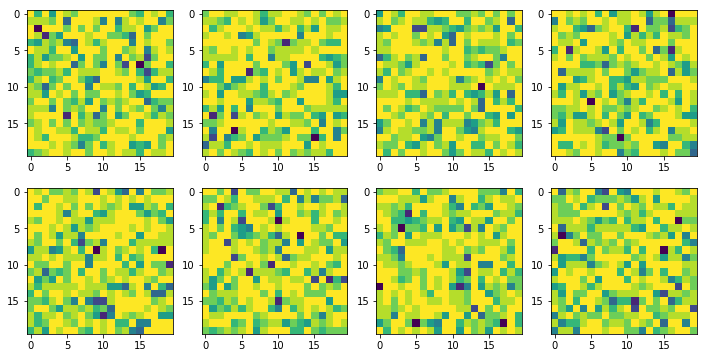

In [163]:
plt.figure(figsize=(12,6))
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.imshow(rv[i])
    # plt.colorbar()

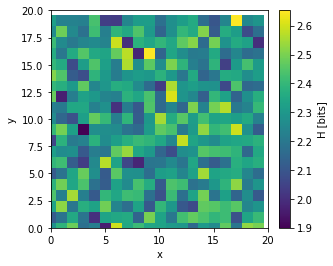

In [164]:
h_sec = hspace.measures.EntropySection(rv)
h_sec.plot_entropy()

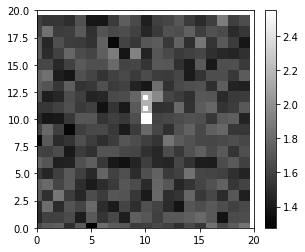

In [165]:
pos = np.array([[10,10],[10,11],[10,12]])
h_sec.calc_cond_entropy_section(pos=pos)
h_sec.plot_mutual_info(pos=pos) #, vmin=0., vmax=2)

In [166]:
def m_hist(hmin, hmax):
    plt.hist((h_sec.h - h_sec.cond_entropy_section).ravel(), bins=np.linspace(hmin,hmax));
    
interact(m_hist, 
         hmin=widgets.FloatSlider(min=0.,max=10.,step=.1,value=0.),
         hmax=widgets.FloatSlider(min=0.,max=10.,step=.1,value=10.));

interactive(children=(FloatSlider(value=0.0, description='hmin', max=10.0), FloatSlider(value=10.0, descriptio…